# HEART FAILURE PREDICTION

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide. Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

In [2]:
data=pd.read_csv("dataset/heart_failure_clinical_records_dataset.csv")
data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [3]:
print("Shape of the data",data.shape)

Shape of the data (299, 13)


In [4]:
print("Information about data:-")
data.info()

Information about data:-
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 3

In [5]:
print("Describing the data :-")
data.describe()

Describing the data :-


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
print(f"No. of Null values:-")
data.isnull().sum()

No. of Null values:-


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No of death:- 96
No of live:- 203


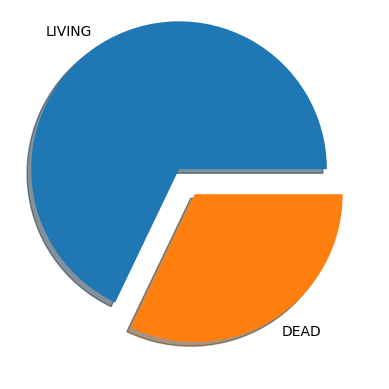

In [7]:
# seeing the distribution of classes in death and live
len_live=len(data["DEATH_EVENT"][data.DEATH_EVENT==0])
len_death=len(data["DEATH_EVENT"][data.DEATH_EVENT==1])

arr=np.array([len_live,len_death])
labels=['LIVING','DEAD']
print("No of death:-",len_death)
print("No of live:-",len_live)
plt.pie(arr,labels=labels,explode=[0.2,0],shadow=True)
plt.show()

C:\Users\soham\AppData\Local\Temp\ipykernel_21240\1143476676.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["age"])


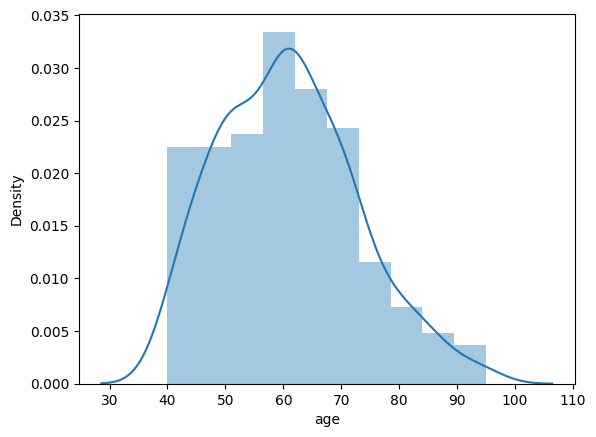

In [8]:
sns.distplot(data["age"])
plt.show()

No of death:- 85
No of live:- 167


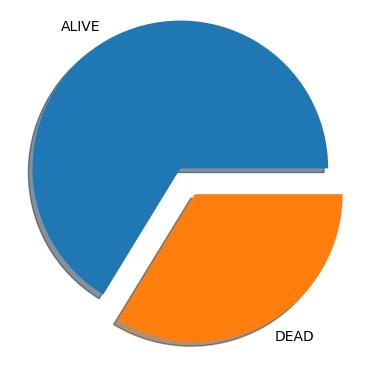

In [9]:
# selecting data above age 50
age_above_50_not_died=len(data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==0])
age_above_50_died=len(data['DEATH_EVENT'][data.age>=50][data.DEATH_EVENT==1])


labels=['ALIVE','DEAD']
print("No of death:-",age_above_50_died)
print("No of live:-",age_above_50_not_died)
arr=np.array([age_above_50_not_died,age_above_50_died])
plt.pie(arr,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()

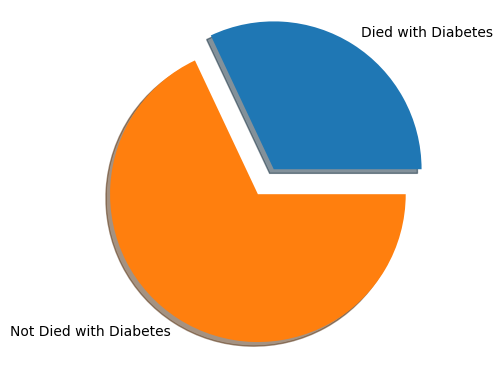

In [10]:
len_d_alive = len(data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 0])
len_d_died = len(data['DEATH_EVENT'][data.diabetes == 1][data.DEATH_EVENT == 1])


arr = [len_d_died,len_d_alive] 
labels = ['Died with Diabetes', "Not Died with Diabetes"] 
plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()  

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


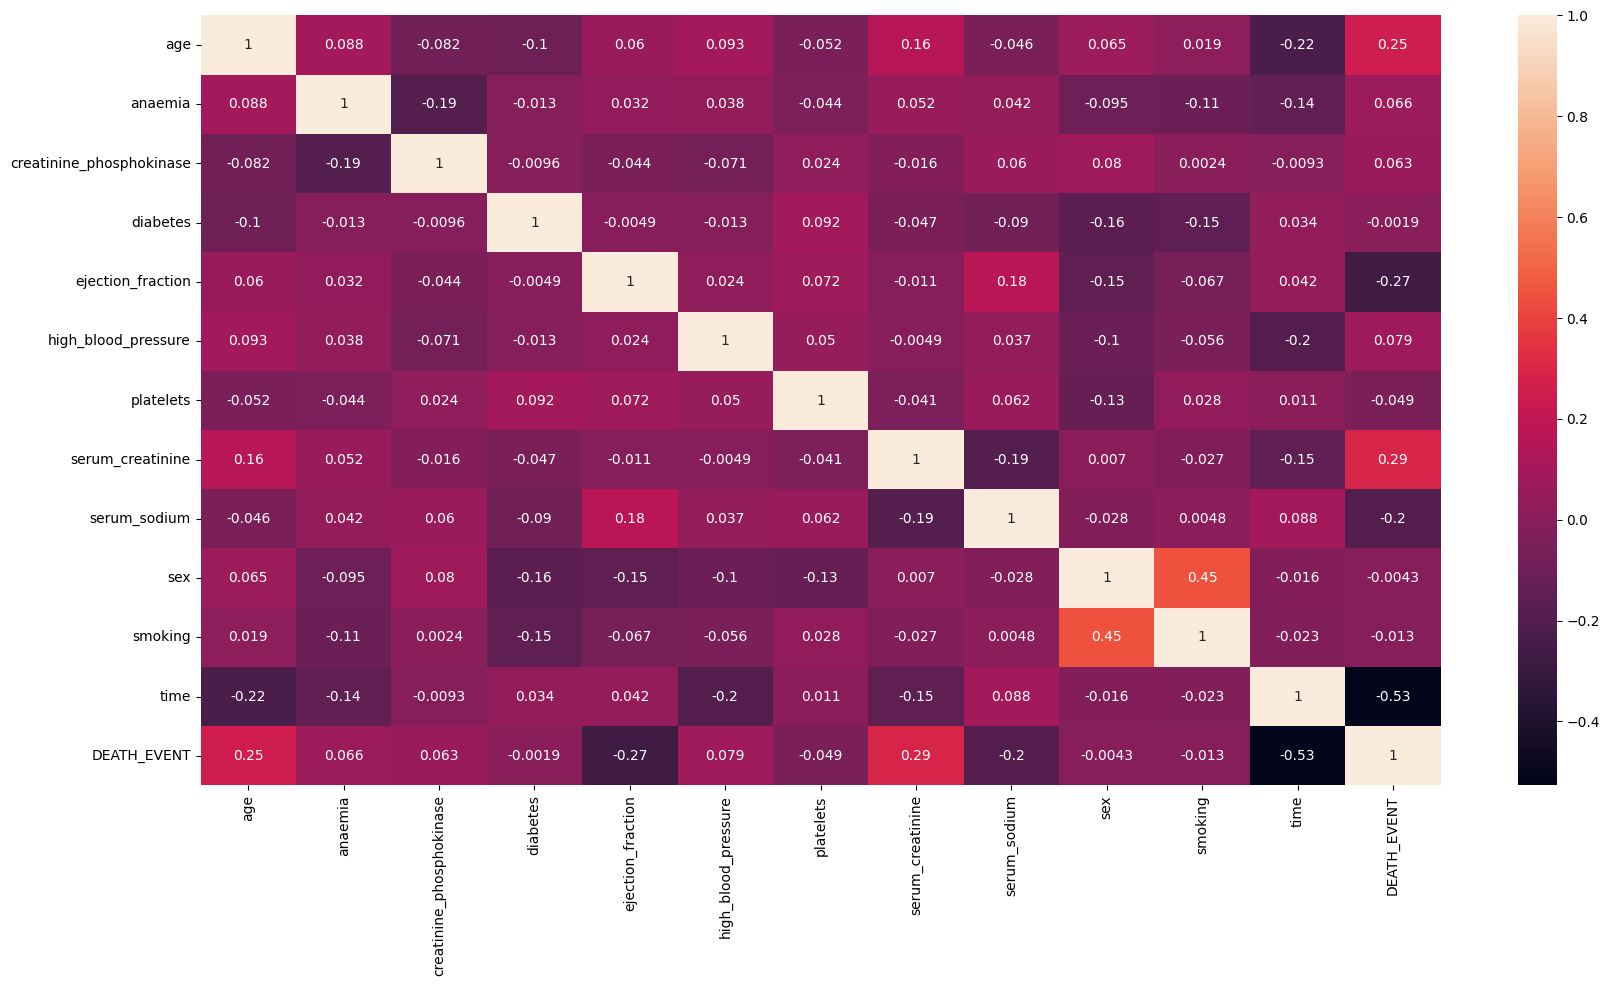

In [30]:
#checking correlation

corr=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr,annot=True)

data.corr().style.background_gradient(cmap='coolwarm')


# DATASET DEVELOPMENT

In [12]:
from sklearn.model_selection import train_test_split
x=data.drop('DEATH_EVENT',axis=1)
y=data['DEATH_EVENT']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print("Shape of the x_train",x_train.shape)
print("Shape of the x_test",x_test.shape)
print("Shape of the y_train",y_train.shape)
print("Shape of the y_test",y_test.shape)

Shape of the x_train (209, 12)
Shape of the x_test (90, 12)
Shape of the y_train (209,)
Shape of the y_test (90,)


In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
def evaluating_model(y_test, y_pred):  
    ''' 
    Function for evaluating our models.
    '''
    print("Accuracy Score:- ", accuracy_score(y_test, y_pred)) 
    print("Precision Score:- ", precision_score(y_test, y_pred)) 
    print("Recall Score:- ", recall_score(y_test, y_pred)) 
    print("Confusion Matrix:- \n", confusion_matrix(y_test, y_pred))

In [14]:
# building logistic regression model as a baseline model 

from sklearn.linear_model import LogisticRegression 

lr_clf = LogisticRegression(max_iter=1000) 
lr_clf.fit(x_train, y_train) 

lr_clf_pred = lr_clf.predict(x_test) 

In [15]:
y_pred = lr_clf.predict(x_test)
evaluating_model(y_test, y_pred)

Accuracy Score:-  0.7888888888888889
Precision Score:-  0.7647058823529411
Recall Score:-  0.4642857142857143
Confusion Matrix:- 
 [[58  4]
 [15 13]]


In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# By standard scaling the data is being is under standardisation where the data
# is arranged around the mean of the feature such that the mean is zero while
# the other features are multiples of unit standard variances. It is done so that 
# high value features(not outliers) does not get more importance in building model

# pipelines are like functions with nested loops where the loops are created of
# objects through which the data sets are passed.

lr_clf_pip = make_pipeline(StandardScaler(), LogisticRegression()) 
lr_clf_pip.fit(x_train, y_train) 

y_pred1 = lr_clf_pip.predict(x_test)
evaluating_model(y_test,y_pred1)

Accuracy Score:-  0.8111111111111111
Precision Score:-  0.7894736842105263
Recall Score:-  0.5357142857142857
Confusion Matrix:- 
 [[58  4]
 [13 15]]


In [17]:
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV 

# Hyperparameters are parameters whose values control the learning process and determine the values of model parameters that a learning algorithm ends up learning.
# GridSearchCV is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters
# param_grid is contains of c, gamma , kernel which is used to determine the hyperplane for svm model the rbf kernel is function of infinite dimension but kernel is very simple.
# the smoothness of the hyperplane is set by the gamma and c function
# here the grid search cv is used to find the optimal kernel specs for the best svm model
# Refit an estimator using the best found parameters on the whole dataset
# verbose helps in printing messages about each parameter candidate

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose =3) 
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.690 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.667 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.683 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.667 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [18]:
grid.best_estimator_

SVC(C=10, gamma=0.0001)

In [19]:
svc=SVC(C=10,gamma=0.0001)
svc.fit(x_train,y_train)
y_pred2=svc.predict(x_test)
evaluating_model(y_test,y_pred2)

Accuracy Score:-  0.6777777777777778
Precision Score:-  0.4
Recall Score:-  0.07142857142857142
Confusion Matrix:- 
 [[59  3]
 [26  2]]


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

def randomized_search(params, runs=20, clf=DecisionTreeClassifier(random_state=2)): 
    rand_clf = RandomizedSearchCV(clf, params, n_iter=runs, cv=5, n_jobs=-1, random_state=2) 
    rand_clf.fit(x_train, y_train) 
    best_model = rand_clf.best_estimator_
    best_score = rand_clf.best_score_

    print("Training score: {:.3f}".format(best_score))
    y_pred = best_model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('Test score: {:.3f}'.format(accuracy))
    
    return best_model
# for the params the documentation site is good 

randomized_search(params={'criterion':['entropy', 'gini'],
                              'splitter':['random', 'best'],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01],
                          'min_samples_split':[2, 3, 4, 5, 6, 8, 10],
                          'min_samples_leaf':[1, 0.01, 0.02, 0.03, 0.04],
                          'min_impurity_decrease':[0.0, 0.0005, 0.005, 0.05, 0.10, 0.15, 0.2],
                          'max_leaf_nodes':[10, 15, 20, 25, 30, 35, 40, 45, 50, None],
                          'max_features':['auto', 0.95, 0.90, 0.85, 0.80, 0.75, 0.70],
                          'max_depth':[None, 2,4,6,8],
                          'min_weight_fraction_leaf':[0.0, 0.0025, 0.005, 0.0075, 0.01, 0.05]
                         })

Training score: 0.847
Test score: 0.756


DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2)

In [21]:
ds_clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=0.75,
                       max_leaf_nodes=25, min_impurity_decrease=0.0005,
                       min_samples_split=5, min_weight_fraction_leaf=0.0075,
                       random_state=2) 
ds_clf.fit(x_train, y_train) 
pred4 = ds_clf.predict(x_test) 
evaluating_model(y_test, pred4)

Accuracy Score:-  0.7555555555555555
Precision Score:-  0.625
Recall Score:-  0.5357142857142857
Confusion Matrix:- 
 [[53  9]
 [13 15]]


In [22]:
from sklearn.ensemble import RandomForestClassifier 

randomized_search(params={
                         'min_samples_leaf':[1,2,4,6,8,10,20,30],
                          'min_impurity_decrease':[0.0, 0.01, 0.05, 0.10, 0.15, 0.2],
                          'max_features':['auto', 0.8, 0.7, 0.6, 0.5, 0.4],
                          'max_depth':[None,2,4,6,8,10,20], 
                         }, clf=RandomForestClassifier(random_state=2))

Training score: 0.847
Test score: 0.867


RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2)

In [23]:
rf_clf = RandomForestClassifier(max_depth=2, max_features=0.5,
                       min_impurity_decrease=0.01, min_samples_leaf=10,
                       random_state=2) 
rf_clf.fit(x_train, y_train)  
pred5 = rf_clf.predict(x_test) 
evaluating_model(y_test, pred5)

Accuracy Score:-  0.8666666666666667
Precision Score:-  0.9
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[60  2]
 [10 18]]


In [24]:
from xgboost import XGBClassifier

# xgboost is the repeated reducing of errors in classification by taking into consideration the features for which the previous model went wrong

xgb1 = XGBClassifier(colsample_bytree= 1.0,
 learning_rate = 0.1,
 max_depth = 4,
 n_estimators= 400,
 subsample= 1.0)  

eval_set  = [(x_test, y_test)]

xgb1.fit(x_train, y_train,early_stopping_rounds=10, eval_metric="logloss",eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.63929
[1]	validation_0-logloss:0.59762
[2]	validation_0-logloss:0.56422
[3]	validation_0-logloss:0.53184
[4]	validation_0-logloss:0.50465
[5]	validation_0-logloss:0.48130
[6]	validation_0-logloss:0.46135
[7]	validation_0-logloss:0.44722
[8]	validation_0-logloss:0.43508
[9]	validation_0-logloss:0.42311
[10]	validation_0-logloss:0.40869
[11]	validation_0-logloss:0.39828
[12]	validation_0-logloss:0.39094
[13]	validation_0-logloss:0.38523
[14]	validation_0-logloss:0.37836
[15]	validation_0-logloss:0.37250
[16]	validation_0-logloss:0.36963
[17]	validation_0-logloss:0.36676
[18]	validation_0-logloss:0.36467
[19]	validation_0-logloss:0.36335
[20]	validation_0-logloss:0.36152
[21]	validation_0-logloss:0.36137
[22]	validation_0-logloss:0.35676
[23]	validation_0-logloss:0.35485
[24]	validation_0-logloss:0.35313
[25]	validation_0-logloss:0.34993
[26]	validation_0-logloss:0.34873
[27]	validation_0-logloss:0.34697
[28]	validation_0-logloss:0.34448
[29]	validation_0-loglos

C:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\soham\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-logloss:0.33418
[39]	validation_0-logloss:0.33277
[40]	validation_0-logloss:0.33211
[41]	validation_0-logloss:0.32965
[42]	validation_0-logloss:0.32868
[43]	validation_0-logloss:0.32739
[44]	validation_0-logloss:0.32850
[45]	validation_0-logloss:0.32888
[46]	validation_0-logloss:0.33055
[47]	validation_0-logloss:0.32993
[48]	validation_0-logloss:0.33082
[49]	validation_0-logloss:0.32964
[50]	validation_0-logloss:0.32906
[51]	validation_0-logloss:0.32838
[52]	validation_0-logloss:0.32767
[53]	validation_0-logloss:0.32966


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1.0,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=400,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [25]:
pred6 = xgb1.predict(x_test) 
evaluating_model(y_test, pred6)

Accuracy Score:-  0.8555555555555555
Precision Score:-  0.8
Recall Score:-  0.7142857142857143
Confusion Matrix:- 
 [[57  5]
 [ 8 20]]


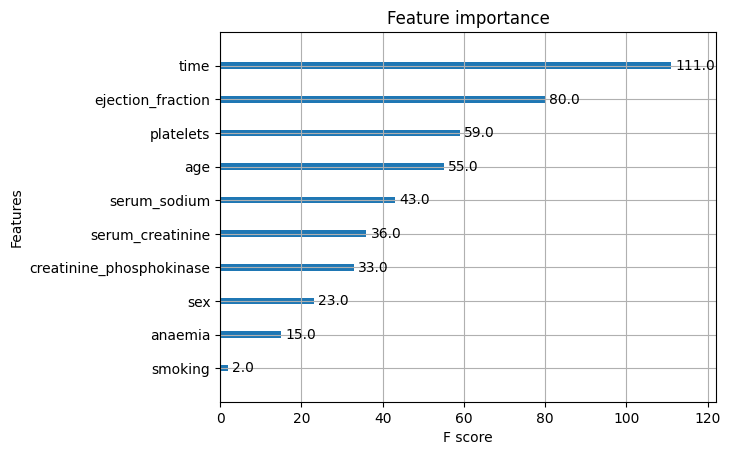

In [26]:
from xgboost import plot_importance
# xgb.feature_importances_ 
plot_importance(xgb1)
plt.show()

In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,max_depth=1,random_state=0) 
gbdt.fit(x_train, y_train) 

pred_gdbt = gbdt.predict(x_test) 
evaluating_model(y_test, pred_gdbt)

Accuracy Score:-  0.8555555555555555
Precision Score:-  0.8571428571428571
Recall Score:-  0.6428571428571429
Confusion Matrix:- 
 [[59  3]
 [10 18]]
